# Implementation of ARIMA for Temperature forecast

## Reading all the required libraries for plots/eda/model build/testing

In [2]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

## Importing the data 

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv")
print(df.describe())
df

              Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


## Exploratory data analysis 

#### The purpose of this step is to get familiar with the data and get the p,d,q values required to model the time series.We start by checking the stationarity of the time series - 2 ways to do this, either visually or via Augmented Dicky Fueller test


### Visual inspection of stationarity

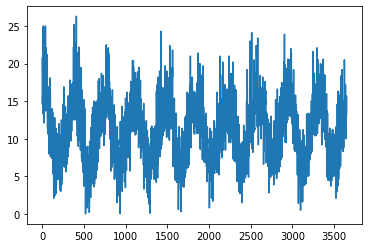

In [24]:
plt.plot(df.Temp)
#the data shows a somewhat constant mean and variance

### Augmented Dicky Fuller Test

In [25]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(df.Temp.dropna())
print('P value: %f' % test[1] )
#the data does not need to be differenced since we can reject the null hypothesis around stationarity

P value: 0.000247


### Autocorrelation Plot

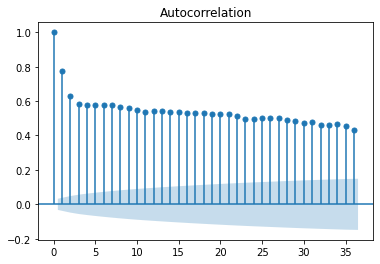

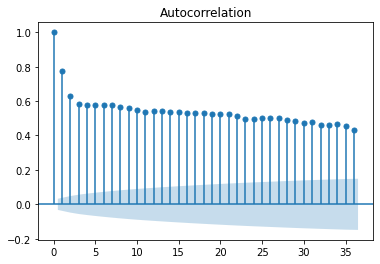

In [54]:
plot_acf(df.Temp.dropna()) ## autocorrelation without differencing

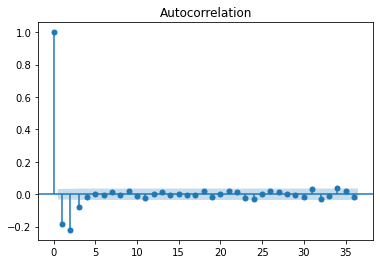

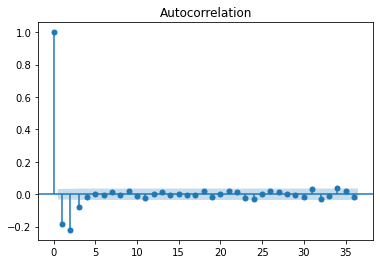

In [45]:
plot_acf(df.Temp.diff().dropna()) 
## with 1st order differencing, the lag becomes negative very fast. No need for differencing.

### Finding the AR term of the model

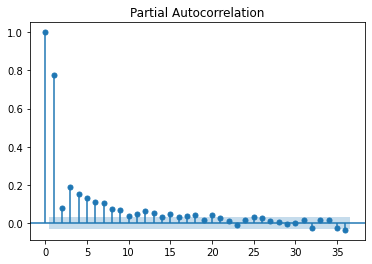

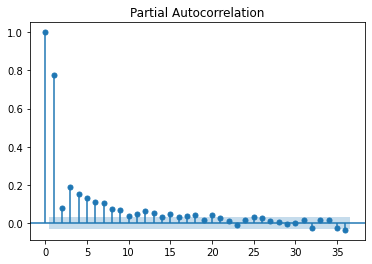

In [51]:
# plotting a pacf plot to find the partial autocorrelation between variable and hence the right p to be selected
plot_pacf(df.Temp.dropna())
#from the plot it looks like taking 2 lagged terms(since they're the ones way above significance level) should suffice

### Finding the MA term of the model

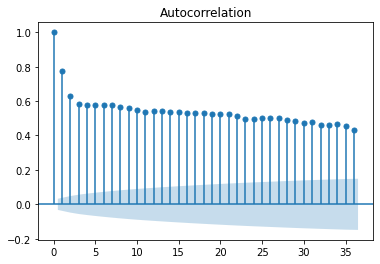

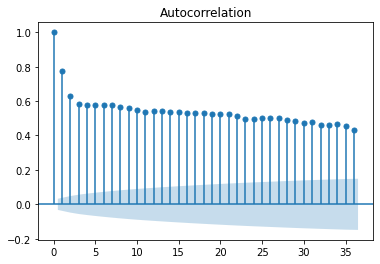

In [55]:
# plotting a acf plot to find the autocorrelation between variable and hence the right q to be selected
plot_acf(df.Temp.dropna())
#Quite a few lags are above the significane line, lets take 2 to begin with

## Building the model

### Splitting the model into train test split

In [19]:
train_df = df[df.Date<="1988-12-31"]
test_df = df[df.Date>"1988-12-31"]
train_df = train_df.Temp
test_df = test_df.Temp
print(train_df)
print(test_df)

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
2915     9.5
2916    12.9
2917    12.9
2918    14.8
2919    14.1
Name: Temp, Length: 2920, dtype: float64
2920    14.3
2921    17.4
2922    18.5
2923    16.8
2924    11.5
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 730, dtype: float64


### Training the model

In [82]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_df, order = (3,0,5))
model_fit = model.fit(disp=0)

model_fit.summary()
#after testing the couple of iterations of the model, we settle on the ones selected aboveb

c:\users\tanya\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\tanya\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overfl

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 2920
Model:                     ARMA(3, 5)   Log Likelihood               -6724.315
Method:                       css-mle   S.D. of innovations              2.419
Date:                Sat, 23 Oct 2021   AIC                          13468.630
Time:                        16:10:48   BIC                          13528.423
Sample:                             0   HQIC                         13490.167
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0808      0.101    109.419      0.000      10.882      11.279
ar.L1.Temp     1.0156        nan        nan        nan         nan         nan
ar.L2.Temp     0.9663        nan        nan        nan         nan         nan
ar.L3.Temp    -0.9825        nan        nan        nan         nan         nan
ma.L1.Temp    -0.4731      0.020    -23.691      0.000      -0.512      -0.434
ma.L2.Temp    -1.3362      0.014    -97.422      0.000      -1.363      -1.309
ma.L3.Temp     0.3145      0.038      8.215      0.000       0.239       0.390
ma.L4.Temp     0.3589      0.026     13.672      0.000       0.307       0.410
ma.L5.Temp     0.1372      0.015      9.073      0.000       0.108       0.167
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0170           -0.0000j            1.0170           -0.5000
AR.2            1.0003           -0.0173j            1.0004           -0.0028
AR.3            1.0003           +0.0173j            1.0004            0.0028
MA.1            1.0127           -0.0156j            1.0128           -0.0025
MA.2            1.0127           +0.0156j            1.0128            0.0025
MA.3           -1.0182           -0.0000j            1.0182           -0.5000
MA.4           -1.8116           -1.9226j            2.6416           -0.3703
MA.5           -1.8116           +1.9226j            2.6416            0.3703
-----------------------------------------------------------------------------
"""

### Forecasting and visually inspecting the forecast with actuals

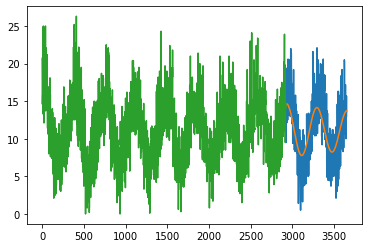

In [83]:
forecast,se,conf = model_fit.forecast(730, alpha=0.05)
actuals_forecast = pd.Series(forecast, index = test_df.index)
plt.plot(test_df)
plt.plot(actuals_forecast)
plt.plot(train_df)

## Model Accuracy Measurement

#### We will do a couple of checks to see whether this is the model for us. We'll check: residual plots, MAPE

### Residual Plots

<AxesSubplot:ylabel='Density'>

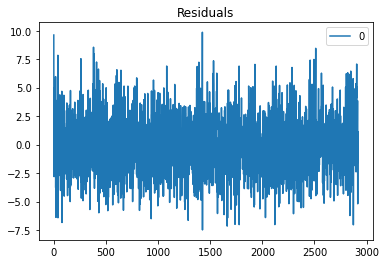

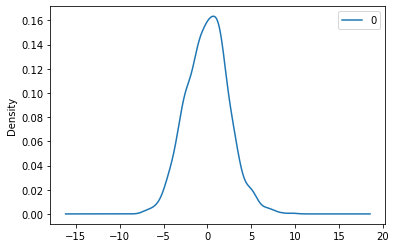

In [88]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "Residuals")
residuals.plot(kind = 'kde')
## it looks like the model residuals are stationary

### MAPE Calculation

In [108]:
comparison = pd.concat([df[df.Date>"1988-12-31"],actuals_forecast], axis = 1)
comparison

,Date,Temp,0
2920,1989-01-01,14.3,14.329473
2921,1989-01-02,17.4,14.494959
2922,1989-01-03,18.5,14.593886
2923,1989-01-04,16.8,14.614735
2924,1989-01-05,11.5,14.609903
...,...,...,...
3645,1990-12-27,14.0,13.682155
3646,1990-12-28,13.6,13.691007
3647,1990-12-29,13.5,13.699069
3648,1990-12-30,15.7,13.706342


In [113]:
mape = np.mean(np.abs(test_df-actuals_forecast)/np.abs(test_df))
mape
## We get a mape of 27%, meaning the model has a 73% accuracy. This model can definitely be improved, but that is a scope for another discussion

0.2728838017770781